In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Prepare Problem**

This Business problem span accross the world and its a major issue globally. Its has made Financial institution go bankcrupt as a case of 2008 in the USA.Bank and other Financial institution  provide funds for potential borrowers and in reture earn a profit depending on the risk they take (the borrowers credit score). They provides loan to their loyal customers. The purpose of this work is to combine Machine learning Intution across customer available data such as credit score gotten from a reliable organisation. This dataset is gotten from Kaggle and its for learning purposes. I dont have any intention for Plagiarism any data.

**2. Approach to solve described problem**

 There are over 100,000 data available for analysis. Two algorithm will be used for evaluation Logistic Regression and Random Forest classifier. we will select one that best suit the given data which will be evaluated based on their AUC score

AUC(Area under curve) score represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s or probabiity. For this problem we will  predit probability. The reason for predicting probability is give the company a range of score for each customer which will be use for **Risk Management**

**3. What result we need**

1. Check in the data is imbalance and use SMOTE technique to see if this solove the problem

2. Convert Loan Status column to binary in order to use as our Dependent variable 

3. Metric for each classifier: AUC score, precision and recall 

**4. Implement solution in python**

#### Load the Data

#### Import Libraries
* Importing all neccessary python modules, functions and objects we are going to use to solve this business problem.

In [ ]:
# Load libraries
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
pd.options.display.max_columns = None
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To deal with Categorical Data in Target Vector.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
frofrom sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


* The dataset  was gotten from Kaggle  [click here](https://www.kaggle.com/zaurbegiev/my-dataset/download) to download.

#### 1b. Load dataset

In [ ]:
train = 'credit_train.csv'
test = 'credit_test.csv'
train = pd.read_csv(train,  sep=',', low_memory=False)
test = pd.read_csv(test,  sep=',', low_memory=False) 

### Summarize the Dataset

In this step we are going to take a look at the data in a few different ways:
* Dimensions of the dataset.
* Peek at the data itself.
* Statistical summary of all attributes.
* Breakdown of the data by the class variable.

#### Dimensions of Dataset

In [ ]:
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100514 rows and 19 columns


In [ ]:
nRow, nCol = test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10353 rows and 18 columns


#### Peek at the data

In [ ]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


####  Statistical Summary
* Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

In [ ]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
test.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+04,8019.000000,8.019000e+03,10000.000000,10000.000000,4694.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,9978.000000,9999.000000
mean,1.160380e+07,1077.991520,1.369106e+06,18429.671699,18.235930,34.964636,11.08410,0.165500,2.907301e+05,6.871308e+05,0.116356,0.030803
std,3.160010e+07,1477.467761,8.687557e+05,12399.956192,7.018356,21.640291,5.02338,0.500934,3.881687e+05,1.861394e+06,0.349961,0.288215
min,1.947000e+04,585.000000,8.109200e+04,0.000000,3.800000,0.000000,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.789480e+05,706.000000,8.483405e+05,10202.857500,13.600000,17.000000,7.00000,0.000000,1.086515e+05,2.706000e+05,0.000000,0.000000
50%,3.092760e+05,725.000000,1.168272e+06,16052.055000,17.000000,32.000000,10.00000,0.000000,2.075180e+05,4.626050e+05,0.000000,0.000000
75%,5.157075e+05,741.000000,1.664390e+06,23881.337500,21.700000,50.000000,14.00000,0.000000,3.624630e+05,7.861150e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.781535e+07,229057.920000,62.500000,131.000000,55.00000,10.000000,1.623744e+07,1.459073e+08,5.000000,9.000000


In [ ]:
train.describe(include='object')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,996809f8-c806-469e-bf5b-dd17322bcb3f,316ee3c1-649c-4f9e-b148-ef438db94eb4,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


In [ ]:
test.describe(include='object')

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose
count,10000,10000,10000,9573,10000,10000
unique,10000,10000,2,11,4,16
top,133648a7-84dd-4572-b6dd-5479a4198d55,17189b11-de8f-438a-bf89-a53a25385741,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,1,1,7295,3085,4867,7878


From the above descriptive statistical analysis we can observed the high occurance of values in various columns such as Loan Status, Term, Years in current job, Home Ownership and Purpose. This will be used in filling missing values for the respective columns.

#### Class Distribution
* Let's now take a look at the number of instances (rows) that belong to each class. We can view
this as an absolute count.

In [ ]:
#class distribution
train.groupby('Loan Status').size()

Loan Status
Charged Off    22639
Fully Paid     77361
dtype: int64

### Data Visualization
* Data Info
* checking for missing values
* Univariate analysis 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [ ]:
#checking for missing values
train.isna().mean()*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

In [ ]:
train.isna().mean()*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

#### Univariate Analysis

In [ ]:
#function returns histogram, #box-plot, 5-point statistics
def analyze_feature(df, feature, rotation=0):
   
    fig, ax = pyplot.subplots(figsize=(10,4), ncols=2, nrows=1)
    sns.distplot(df[feature], kde=False, rug=True, ax=ax[0])
    sns.boxplot(feature, orient='h', data=df, ax=ax[1])
   
    for ax in ax:
        for tick in ax.get_xticklabels():
            tick.set_rotation(rotation)
            
    return df[feature].describe().to_frame().T

#### Years of credit history

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,count,mean,std,min,25%,50%,75%,max
Years of Credit History,100000.0,18.199141,7.015324,3.6,13.5,16.9,21.7,70.5


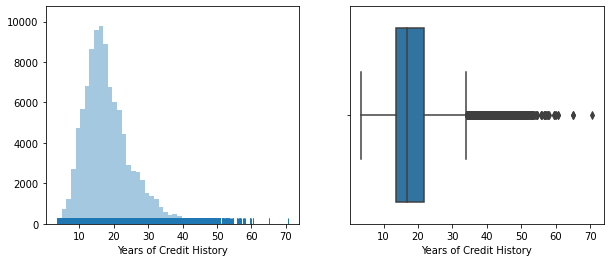

In [ ]:
analyze_feature(train, 'Years of Credit History')

#### Monthly Debt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,count,mean,std,min,25%,50%,75%,max
Monthly Debt,100000.0,18472.412336,12174.992609,0.0,10214.1625,16220.3,24012.0575,435843.28


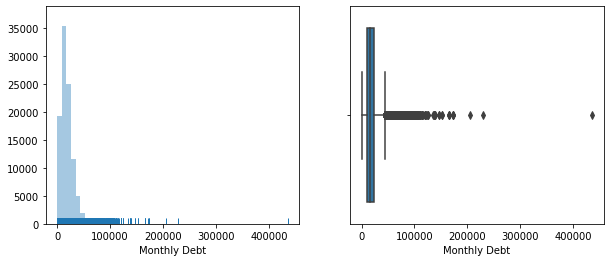

In [ ]:
analyze_feature(train, 'Monthly Debt')

#### Number of Credit Problems

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,count,mean,std,min,25%,50%,75%,max
Number of Credit Problems,100000.0,0.16831,0.482705,0.0,0.0,0.0,0.0,15.0


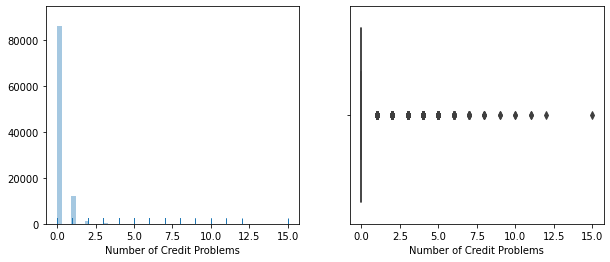

In [ ]:

analyze_feature(train, 'Number of Credit Problems')

#### Current Credit Balance

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,count,mean,std,min,25%,50%,75%,max
Current Credit Balance,100000.0,294637.38235,376170.934666,0.0,112670.0,209817.0,367958.75,32878968.0


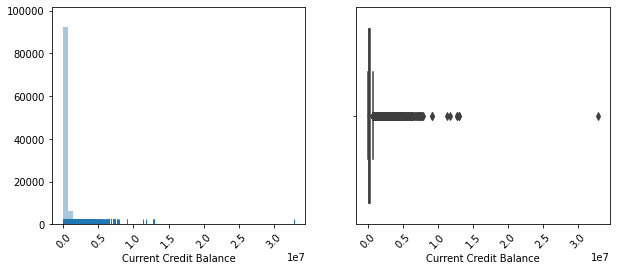

In [ ]:
analyze_feature(train, 'Current Credit Balance', 45)

#### Filling Missing Values

In [ ]:
#iterating the dataset looking for missing value
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing value")

Loan ID: 514 missing value
Customer ID: 514 missing value
Loan Status: 514 missing value
Current Loan Amount: 514 missing value
Term: 514 missing value
Credit Score: 19668 missing value
Annual Income: 19668 missing value
Years in current job: 4736 missing value
Home Ownership: 514 missing value
Purpose: 514 missing value
Monthly Debt: 514 missing value
Years of Credit History: 514 missing value
Months since last delinquent: 53655 missing value
Number of Open Accounts: 514 missing value
Number of Credit Problems: 514 missing value
Current Credit Balance: 514 missing value
Maximum Open Credit: 516 missing value
Bankruptcies: 718 missing value
Tax Liens: 524 missing value


In [ ]:
#iterating the dataset looking for missing value
for i in test.columns:
    print (i + ": "+str(sum(test[i].isnull()))+" missing value")

Loan ID: 353 missing value
Customer ID: 353 missing value
Current Loan Amount: 353 missing value
Term: 353 missing value
Credit Score: 2334 missing value
Annual Income: 2334 missing value
Years in current job: 780 missing value
Home Ownership: 353 missing value
Purpose: 353 missing value
Monthly Debt: 353 missing value
Years of Credit History: 353 missing value
Months since last delinquent: 5659 missing value
Number of Open Accounts: 353 missing value
Number of Credit Problems: 353 missing value
Current Credit Balance: 353 missing value
Maximum Open Credit: 353 missing value
Bankruptcies: 375 missing value
Tax Liens: 354 missing value


In [ ]:
#filling with mode
def impute_mode(df, feature): 
  most_frequent_category=df[feature].mode()[0]
  df[feature].fillna(most_frequent_category,inplace=True)

In [ ]:
impute_mode(train, 'Term')
impute_mode(train, 'Home Ownership')
impute_mode(train, 'Purpose')
impute_mode(train, 'Years in current job')
impute_mode(train, 'Loan Status')

In [ ]:
impute_mode(test, 'Term')
impute_mode(test, 'Home Ownership')
impute_mode(test, 'Purpose')
impute_mode(test, 'Years in current job')

In [ ]:
#filling with meadian
def impute_median(df, feature): 
    df[feature].fillna(df[feature].median(),inplace=True)

In [ ]:
impute_median(train, 'Current Loan Amount')
impute_median(train, 'Annual Income')
impute_median(train, 'Monthly Debt')
impute_median(train, 'Months since last delinquent')
impute_median(train, 'Years of Credit History')
impute_median(train, 'Tax Liens')
impute_median(train, 'Number of Open Accounts')
impute_median(train, 'Current Credit Balance')
impute_median(train, 'Maximum Open Credit')
impute_median(train, 'Bankruptcies')
impute_median(train, 'Number of Credit Problems')

In [ ]:
impute_median(test, 'Current Loan Amount')
impute_median(test, 'Annual Income')
impute_median(test, 'Monthly Debt')
impute_median(test, 'Months since last delinquent')
impute_median(test, 'Years of Credit History')
impute_median(test, 'Tax Liens')
impute_median(test, 'Number of Open Accounts')
impute_median(test, 'Current Credit Balance')
impute_median(test, 'Maximum Open Credit')
impute_median(test, 'Bankruptcies')
impute_median(test, 'Number of Credit Problems')

In [ ]:
def impute_zero(df, feature):
    df[feature].fillna(0, inplace=True) 

In [ ]:
impute_zero(train, 'Credit Score')
impute_zero(test, 'Credit Score')

It can be seen that around 2 type of loan status exist in this data set i.e. Defaulted and Not Defaulted. Hence, we will need to add a new variable which will be of binomial type (0s and 1s).

* 0 means Not Defaulted
* 1 means Defaulted
All those loans, whose status is **Fully Paid** will be categorized as Not Defaulted and **Charged off** will be categorized as Defaulted. 

In [ ]:
train['Loan Status'].value_counts()/ len(train)*100

Fully Paid     77.476769
Charged Off    22.523231
Name: Loan Status, dtype: float64

It can be seen from above table that only 22.5% of loans are defaulted. Hence, this is very imbalanced data set, which will require some tweaking in parameters during prediction modelling. This we will cover at the end of this entire analysis if need be

In [ ]:
do ={'Fully Paid':0,'Charged Off':1}

In [ ]:
train['default_not'] = train['Loan Status'].map(do)

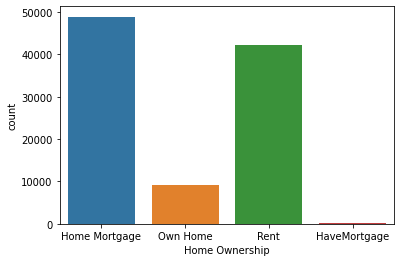

In [ ]:
sns.countplot(data=train, x='Home Ownership')

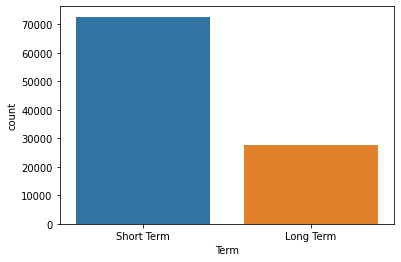

In [ ]:
sns.countplot(data=train, x='Term')

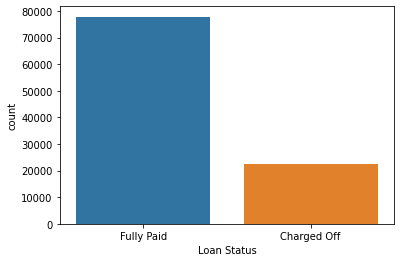

In [ ]:
sns.countplot(data=train, x='Loan Status')

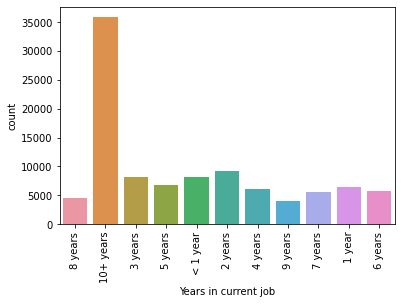

In [ ]:
sns.countplot(data=train, x='Years in current job')
pyplot.xticks(rotation=90)
pyplot.show()

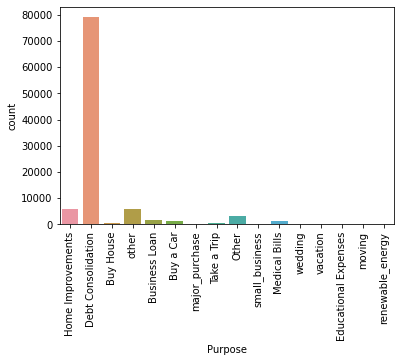

In [ ]:
sns.countplot(data=train, x='Purpose')
pyplot.xticks(rotation=90)
pyplot.show()

#### Droping of uninformative columns¶
This is as a result of the Column that are irrelevant in model building

In [ ]:
xyz = ['Loan ID', 'Customer ID']
train.drop(xyz,axis=1,inplace=True)
print("shape of data is: {}".format(train.shape))

shape of data is: (100514, 18)


In [ ]:
test.drop(xyz,axis=1,inplace=True)
print("shape of data is: {}".format(train.shape))

shape of data is: (100514, 18)


In [ ]:
def outliers(df, feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
  Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
  
  IQR2 = df[feature].quantile(0.75) - df[feature].quantile(0.25)

  Lower_fence = df[feature].quantile(0.25) - (IQR * 1.5)
  Upper_fence = df[feature].quantile(0.75) + (IQR * 1.5)
  
  df[feature] = np.where(df[feature]<Lower_fence, Lower_fence , df[feature] )

In [ ]:
outliers(train, 'Current Loan Amount')
outliers(train, 'Annual Income')
outliers(train, 'Monthly Debt')
outliers(train, 'Months since last delinquent')
outliers(train, 'Years of Credit History')
outliers(train, 'Tax Liens')
outliers(train, 'Number of Open Accounts')
outliers(train, 'Current Credit Balance')
outliers(train, 'Maximum Open Credit')
outliers(train, 'Bankruptcies')
outliers(train, 'Number of Credit Problems')

In [ ]:
outliers(test, 'Current Loan Amount')
outliers(test, 'Annual Income')
outliers(test, 'Monthly Debt')
outliers(test, 'Months since last delinquent')
outliers(test, 'Years of Credit History')
outliers(test, 'Tax Liens')
outliers(test, 'Number of Open Accounts')
outliers(test, 'Current Credit Balance')
outliers(test, 'Maximum Open Credit')
outliers(test, 'Bankruptcies')
outliers(test, 'Number of Credit Problems')

Let us deal with the categorical values in the training and test dataset

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['Term'] = labelencoder.fit_transform(train['Term'])
test['Term'] = labelencoder.fit_transform(test['Term'])

In [ ]:
cat  = ['Home Ownership', 'Purpose']
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# create dummy columns and drop the first dummy column
df_dropped = pd.get_dummies(train[cat], prefix='cat', drop_first=True)
df_droppedtest = pd.get_dummies(test[cat], prefix='cat', drop_first=True)

# change the data type to float
#df_dropped = df_dropped.astype('float')


In [ ]:
# merge with main df bridge_df on key values
train = train.join(df_dropped)
test = test.join(df_droppedtest)

In [ ]:
train.drop(cat, axis=1, inplace=True)
test.drop(cat, axis=1, inplace=True)

In [ ]:
train['Years in current job'].value_counts()

10+ years    35857
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [ ]:
train['Years in current job'].replace({'< 1 year': '0'}, inplace=True)
train['Years in current job'].replace({'1 year': '1'}, inplace=True)
train['Years in current job'].replace({'2 years': '2'}, inplace=True)
train['Years in current job'].replace({'3 years': '3'}, inplace=True)
train['Years in current job'].replace({'4 years': '4'}, inplace=True)
train['Years in current job'].replace({'5 years': '5'}, inplace=True)
train['Years in current job'].replace({'6 years': '6'}, inplace=True)
train['Years in current job'].replace({'7 years': '7'}, inplace=True)
train['Years in current job'].replace({'8 years': '8'}, inplace=True)
train['Years in current job'].replace({'9 years': '9'}, inplace=True)
train['Years in current job'].replace({'10+ years': '10'}, inplace=True)

In [ ]:
test['Years in current job'].replace({'< 1 year': '0'}, inplace=True)
test['Years in current job'].replace({'1 year': '1'}, inplace=True)
test['Years in current job'].replace({'2 years': '2'}, inplace=True)
test['Years in current job'].replace({'3 years': '3'}, inplace=True)
test['Years in current job'].replace({'4 years': '4'}, inplace=True)
test['Years in current job'].replace({'5 years': '5'}, inplace=True)
test['Years in current job'].replace({'6 years': '6'}, inplace=True)
test['Years in current job'].replace({'7 years': '7'}, inplace=True)
test['Years in current job'].replace({'8 years': '8'}, inplace=True)
test['Years in current job'].replace({'9 years': '9'}, inplace=True)
test['Years in current job'].replace({'10+ years': '20'}, inplace=True)

## Data Preprocessing & Feature Engineering

#### Steps

1.   Fine classing
2.   Coarse classing using weight of evidence

Note: For Weight of Evidence calculations, Target value **1 is referred to the Good** class while Target value **0 is reffered to the Bad class**. However, in the real context of the business problem it is vice versa. 


In [ ]:
#merge train and test together


In [ ]:
def woe_continuous(df, variable, target_variable, discrete=False):
    """
    params:
    df: A dataframe containing both discrete variables and continuous variables.
    variable: Variable to get WoE as a string, ie. 'employment'.
    target_variable: Discrete dependent variable split from main dataset. 
    discrete: A switch for turning on and off the variable type.
    
    return:
    data: A dataframe with WoE and IV (Information Value) calculated.
    
    Example:
    woe_IV = woe_discrete(df=dataframe, variable='discrete_variable_name_in_dataframe', 
    target_variable=dependent_variable_array_or_dataframe)
    """
    data = pd.concat([df[variable], target_variable], axis=1)
    data = pd.concat([data.groupby(data.columns.values[0], as_index=False)[data.columns.values[1]].count(),
                      data.groupby(data.columns.values[0], as_index=False)[data.columns.values[1]].mean()], axis=1)
    data = data.iloc[:,[0,1,3]]
    data.columns = [data.columns.values[0], 'n_obs', 'prop_good']
    data['prop_n_obs'] = data['n_obs'] / data['n_obs'].sum()
    data['n_good'] = data['prop_good'] * data['n_obs']
    data['n_bad'] = (1-data['prop_good']) * data['n_obs']
    data['prop_n_good'] = data['n_good'] / data['n_good'].sum()
    data['prop_n_bad'] = data['n_bad'] / data['n_bad'].sum()
    data['WoE'] = np.log(data['prop_n_good'] / data['prop_n_bad'])
    if discrete:
        data = data.sort_values(['WoE'])
        data = data.reset_index(drop=True)
    data['diff_prop_good'] = data['prop_good'].diff().abs()
    data['diff_WoE'] = data['WoE'].diff().abs()
    data['IV'] = (data['prop_n_good'] - data['prop_n_bad']) * data['WoE']
    data['IV'] = data['IV'].sum()
    return data 

In [ ]:
# Function to create plots based on WoE. What we want to plot is the feature name on the x-axis and the WoE on the y-axis
def plot_WoE(WoE_df, rotation=0):
    """
    params:
    Woe_df: A dataframe with Weight of Evidence calculated.
    rotation: A rotation of the x_label axis to show plots cleanly. Default is horizontal = 0.
    
    return: Plot sheet wide weight of evidence
    """
    x_axis = np.array(WoE_df.iloc[:,0].apply(str)) #make sure that the values in the category are strings. We use array because
    # matplotlib doesnt work too well without data in array form.
    y_axis = WoE_df['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x_axis, y_axis, marker='o', linestyle='--', color='k')
    plt.xlabel(WoE_df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + WoE_df.columns[0]))
    plt.xticks(rotation=rotation)

In [ ]:
train.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'default_not', 'cat_Home Mortgage', 'cat_Own Home',
       'cat_Rent', 'cat_Buy House', 'cat_Buy a Car', 'cat_Debt Consolidation',
       'cat_Educational Expenses', 'cat_Home Improvements',
       'cat_Medical Bills', 'cat_Other', 'cat_Take a Trip',
       'cat_major_purchase', 'cat_moving', 'cat_other', 'cat_renewable_energy',
       'cat_small_business', 'cat_vacation', 'cat_wedding'],
      dtype='object')

#### Annual Income

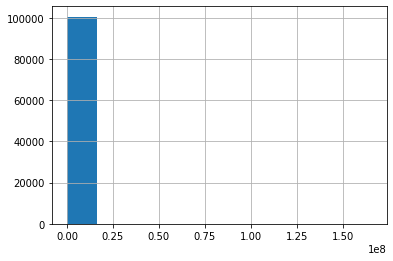

In [ ]:
train['Annual Income'].hist()

In [ ]:
train['Annual Income'].describe()

count    1.005140e+05
mean     1.338337e+06
std      9.731830e+05
min      7.662700e+04
25%      9.324250e+05
50%      1.174162e+06
75%      1.509968e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [ ]:
pd.qcut(train['Annual Income'], q=8).value_counts().sort_values(axis=0, ascending=True)

(1174162.0, 1232910.0]         2735
(1509968.0, 1951292.875]      12561
(932425.0, 1136867.375]       12561
(1232910.0, 1509968.0]        12562
(1951292.875, 165557393.0]    12565
(76626.999, 723242.125]       12565
(723242.125, 932425.0]        12567
(1136867.375, 1174162.0]      22398
Name: Annual Income, dtype: int64

In [ ]:
bins = pd.IntervalIndex.from_tuples([(76626.999, 723242.125), (723242.125, 932425.0),
                                    (932425.0, 1136867.375), (1136867.375, 1174162.0), (1174162.0, 1232910.0), (1232910.0, 1509968.0), (1509968.0, 1951292.875),
                                (1951292.875, 165557393.0)])

In [ ]:
train['AnnualIncome_factor'] = pd.cut(train['Annual Income'], bins=bins, precision=0, right=True)

In [ ]:
train['AnnualIncome_factor'].value_counts()

(1136867.375, 1174162.0]      22398
(723242.125, 932425.0]        12567
(1951292.875, 165557393.0]    12565
(76626.999, 723242.125]       12565
(1232910.0, 1509968.0]        12562
(1509968.0, 1951292.875]      12561
(932425.0, 1136867.375]       12561
(1174162.0, 1232910.0]         2735
Name: AnnualIncome_factor, dtype: int64

In [ ]:
train.groupby('AnnualIncome_factor').mean().head(3)

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,default_not,cat_Home Mortgage,cat_Own Home,cat_Rent,cat_Buy House,cat_Buy a Car,cat_Debt Consolidation,cat_Educational Expenses,cat_Home Improvements,cat_Medical Bills,cat_Other,cat_Take a Trip,cat_major_purchase,cat_moving,cat_other,cat_renewable_energy,cat_small_business,cat_vacation,cat_wedding
AnnualIncome_factor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(76626.999, 723242.125]",1.345016e+07,0.879984,1164.168086,5.608471e+05,8768.016661,15.839331,36.500915,9.031357,0.174771,148004.075448,360641.636769,0.134660,0.017509,0.264465,0.228731,0.149463,0.619737,0.007959,0.020852,0.751612,0.002547,0.037485,0.012495,0.043693,0.009152,0.005173,0.001910,0.087545,0.00008,0.002228,0.002228,0.000557
"(723242.125, 932425.0]",1.344908e+07,0.751731,1126.136628,8.256550e+05,12976.069428,16.867924,36.997056,10.377497,0.182939,196645.645739,453189.870932,0.136150,0.023713,0.245325,0.371767,0.102491,0.523832,0.006366,0.012573,0.799077,0.000875,0.041139,0.011220,0.032705,0.006366,0.003024,0.001830,0.068354,0.00008,0.002228,0.000875,0.001273
"(932425.0, 1136867.375]",1.459459e+07,0.701457,1111.998806,1.028119e+06,15681.177700,17.663928,37.305867,11.007245,0.180320,238745.874214,554196.700103,0.134464,0.022052,0.226415,0.460553,0.087493,0.449248,0.006369,0.011464,0.800732,0.000796,0.051747,0.010031,0.030969,0.005971,0.003184,0.001353,0.060982,0.00000,0.002707,0.000557,0.001353


In [ ]:
df_temp = woe_continuous(train, 'AnnualIncome_factor', train['Credit Score'])

In [ ]:
df_temp

,AnnualIncome_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(76626.999, 723242.125]",12565,1164.168086,0.125007,14627772.0,-14615207.0,0.168083,0.168133,-0.000296,NaN,NaN,0.000001
1,"(723242.125, 932425.0]",12567,1126.136628,0.125027,14152159.0,-14139592.0,0.162618,0.162661,-0.000267,38.031458,0.000029,0.000001
2,"(932425.0, 1136867.375]",12561,1111.998806,0.124968,13967817.0,-13955256.0,0.160499,0.160541,-0.000256,14.137822,0.000011,0.000001
3,"(1136867.375, 1174162.0]",22398,129.801411,0.222835,2907292.0,-2884894.0,0.033407,0.033188,0.006578,982.197395,0.006834,0.000001
4,"(1174162.0, 1232910.0]",2735,1059.188300,0.027210,2896880.0,-2894145.0,0.033287,0.033294,-0.000211,929.386889,0.006789,0.000001
5,"(1232910.0, 1509968.0]",12562,1048.066630,0.124978,13165813.0,-13153251.0,0.151284,0.151314,-0.000201,11.121670,0.000010,0.000001
6,"(1509968.0, 1951292.875]",12561,1028.142823,0.124968,12914502.0,-12901941.0,0.148396,0.148423,-0.000183,19.923806,0.000019,0.000001
7,"(1951292.875, 165557393.0]",12565,986.465101,0.125007,12394934.0,-12382369.0,0.142426,0.142446,-0.000141,41.677722,0.000041,0.000001


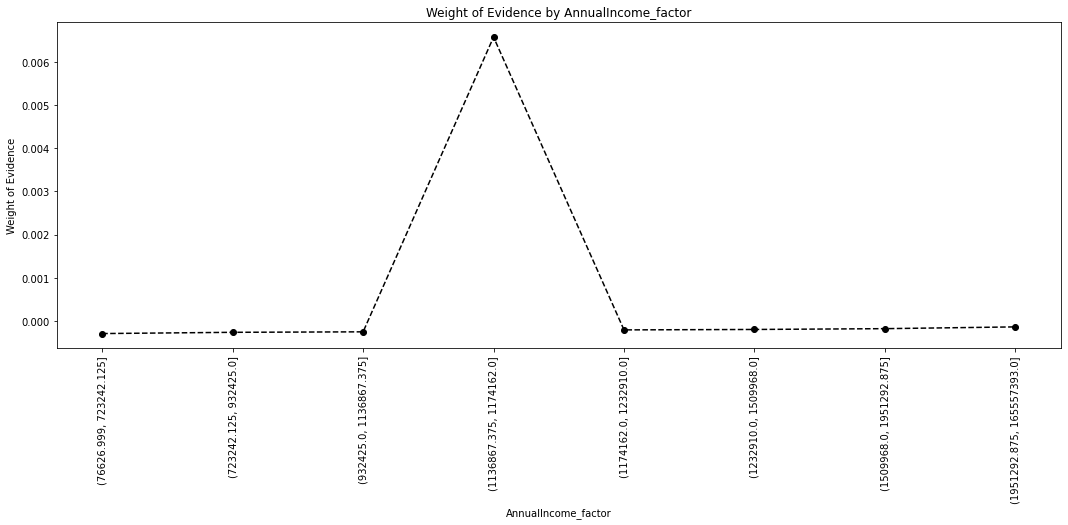

In [ ]:
plot_WoE(df_temp , 90)

In [ ]:
# coarse classing:np.where((df_inputs_prepr['int_rate'] <= 9.548)
# 0 - 1000, 1000-5000, 5000-7000, 7000-10000, 10000-20000, 20000-40000, >=40000

train['AnnualIncome:76626.999, 723242.125'] = np.where((train['Annual Income'] <= 723242.125), 1, 0)
train['AnnualIncome:723242.125, 932425.0'] = np.where((train['Annual Income'] > 723242.125) & (train['Annual Income'] <= 932425.0), 1, 0)
train['AnnualIncome:932425.0, 1136867.375'] = np.where((train['Annual Income']> 932425.0) & (train['Annual Income'] <= 1136867.375), 1, 0)
train['AnnualIncome:1136867.375, 1174162.0'] = np.where((train['Annual Income'] > 1136867.375) & (train['Annual Income'] <= 1174162.0), 1, 0)
train['AnnualIncome:1174162.0, 1232910.0'] = np.where((train['Annual Income'] > 1174162.0) & (train['Annual Income'] <= 1232910.0), 1, 0)
train['AnnualIncome:1232910.0, 1509968.0'] = np.where((train['Annual Income'] > 1232910.0) & (train['Annual Income'] <= 1509968.0), 1, 0)
train['AnnualIncome:1509968.0, 1951292.875'] = np.where((train['Annual Income'] > 1509968.0) & (train['Annual Income'] <= 1951292.875), 1, 0)
train['AnnualIncome:1951292.875, 165557393.0'] = np.where((train['Annual Income'] > 1951292.875) & (train['Annual Income'] <= 165557393.0), 1, 0)

In [ ]:
test['AnnualIncome:76626.999, 723242.125'] = np.where((test['Annual Income'] <= 723242.125), 1, 0)
test['AnnualIncome:723242.125, 932425.0'] = np.where((test['Annual Income'] > 723242.125) & (test['Annual Income'] <= 932425.0), 1, 0)
test['AnnualIncome:932425.0, 1136867.375'] = np.where((test['Annual Income']> 932425.0) & (test['Annual Income'] <= 1136867.375), 1, 0)
test['AnnualIncome:1136867.375, 1174162.0'] = np.where((test['Annual Income'] > 1136867.375) & (test['Annual Income'] <= 1174162.0), 1, 0)
test['AnnualIncome:1174162.0, 1232910.0'] = np.where((test['Annual Income'] > 1174162.0) & (test['Annual Income'] <= 1232910.0), 1, 0)
test['AnnualIncome:1232910.0, 1509968.0'] = np.where((test['Annual Income'] > 1232910.0) & (test['Annual Income'] <= 1509968.0), 1, 0)
test['AnnualIncome:1509968.0, 1951292.875'] = np.where((test['Annual Income'] > 1509968.0) & (test['Annual Income'] <= 1951292.875), 1, 0)
test['AnnualIncome:1951292.875, 165557393.0'] = np.where((test['Annual Income'] > 1951292.875) & (test['Annual Income'] <= 165557393.0), 1, 0)

**Maximum Open Credit**

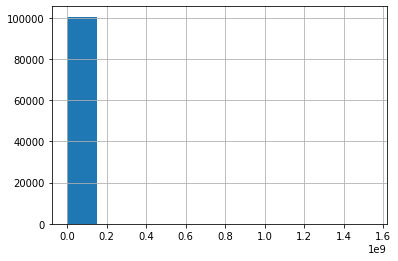

In [ ]:
train['Maximum Open Credit'].hist()

In [ ]:
train['Maximum Open Credit'].describe()

count    1.005140e+05
mean     7.592946e+05
std      8.362980e+06
min      0.000000e+00
25%      2.745160e+05
50%      4.678740e+05
75%      7.804280e+05
max      1.539738e+09
Name: Maximum Open Credit, dtype: float64

In [ ]:
train['Maximum_open_credit_factor'] = pd.qcut(train['Maximum Open Credit'], q=8)

In [ ]:
train['Maximum_open_credit_factor'].value_counts().sort_values(axis=0, ascending=True)

(467874.0, 597635.5]          12305
(274516.0, 365472.25]         12562
(780428.0, 1107108.75]        12563
(1107108.75, 1539737892.0]    12565
(597635.5, 780428.0]          12565
(-0.001, 182165.5]            12565
(182165.5, 274516.0]          12566
(365472.25, 467874.0]         12823
Name: Maximum_open_credit_factor, dtype: int64

In [ ]:
df_temp = woe_continuous(train, 'Maximum_open_credit_factor', train['Credit Score'])

In [ ]:
df_temp

,Maximum_open_credit_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 182165.5]",12565,887.039395,0.125007,11145650.0,-11133085.0,0.128071,0.128074,-0.000028,NaN,NaN,1.065377e-09
1,"(182165.5, 274516.0]",12566,871.071065,0.125017,10945879.0,-10933313.0,0.125775,0.125776,-0.000007,15.968330,0.000021,1.065377e-09
2,"(274516.0, 365472.25]",12562,893.359417,0.124978,11222381.0,-11209819.0,0.128953,0.128957,-0.000036,22.288353,0.000029,1.065377e-09
3,"(365472.25, 467874.0]",12823,850.122436,0.127574,10901120.0,-10888297.0,0.125261,0.125258,0.000021,43.236981,0.000057,1.065377e-09
4,"(467874.0, 597635.5]",12305,884.110849,0.122421,10878984.0,-10866679.0,0.125007,0.125010,-0.000024,33.988413,0.000045,1.065377e-09
5,"(597635.5, 780428.0]",12565,876.116753,0.125007,11008407.0,-10995842.0,0.126494,0.126496,-0.000014,7.994096,0.000010,1.065377e-09
6,"(780428.0, 1107108.75]",12563,849.298416,0.124988,10669736.0,-10657173.0,0.122602,0.122600,0.000022,26.818337,0.000036,1.065377e-09
7,"(1107108.75, 1539737892.0]",12565,816.156944,0.125007,10255012.0,-10242447.0,0.117837,0.117829,0.000070,33.141472,0.000048,1.065377e-09


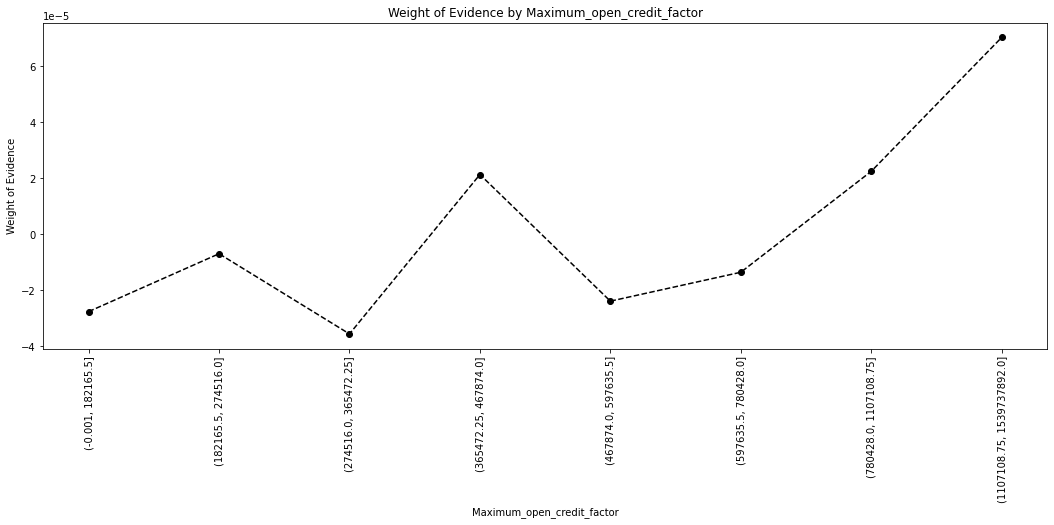

In [ ]:
plot_WoE(df_temp , 90)

In [ ]:
train['Maximum_open_credit_factor:76626.999, 723242.125'] = np.where((train['Maximum Open Credit'] <= 182165.5), 1, 0)
train['Maximum_open_credit_factor, >182165.5 <= 274516.0'] = np.where((train['Maximum Open Credit'] > 182165.5) & (train['Maximum Open Credit'] <= 274516.0), 1, 0)
train['Maximum_open_credit_factor, >274516.0 <= 274516.0'] = np.where((train['Maximum Open Credit'] > 274516.0) & (train['Maximum Open Credit'] <= 365472.25), 1, 0)
train['Maximum_open_credit_factor, >365472.25 <= 365472.25'] = np.where((train['Maximum Open Credit'] > 365472.25) & (train['Maximum Open Credit'] <= 467874.0), 1, 0)
train['Maximum_open_credit_factor, >467874.0 <= 467874.0'] = np.where((train['Maximum Open Credit'] > 467874.0) & (train['Maximum Open Credit'] <= 597635.5), 1, 0)
train['Maximum_open_credit_factor, >597635.5 <= 780428.0'] = np.where((train['Maximum Open Credit'] > 597635.5) & (train['Maximum Open Credit'] <= 780428.0), 1, 0)
train['Maximum_open_credit_factor, >780428.0 <= 1107108.75'] = np.where((train['Maximum Open Credit'] > 780428.0) & (train['Maximum Open Credit'] <= 1107108.75), 1, 0)
train['Maximum_open_credit_factor, >1107108.75 <= 1539737892.0'] = np.where((train['Maximum Open Credit'] > 1107108.75) & (train['Maximum Open Credit'] <= 1539737892.0), 1, 0)

In [ ]:
test['Maximum_open_credit_factor:76626.999, 723242.125'] = np.where((test['Maximum Open Credit'] <= 182165.5), 1, 0)
test['Maximum_open_credit_factor, >182165.5 <= 274516.0'] = np.where((test['Maximum Open Credit'] > 182165.5) & (test['Maximum Open Credit'] <= 274516.0), 1, 0)
test['Maximum_open_credit_factor, >274516.0 <= 274516.0'] = np.where((test['Maximum Open Credit'] > 274516.0) & (test['Maximum Open Credit'] <= 365472.25), 1, 0)
test['Maximum_open_credit_factor, >365472.25 <= 365472.25'] = np.where((test['Maximum Open Credit'] > 365472.25) & (test['Maximum Open Credit'] <= 467874.0), 1, 0)
test['Maximum_open_credit_factor, >467874.0 <= 467874.0'] = np.where((test['Maximum Open Credit'] > 467874.0) & (test['Maximum Open Credit'] <= 597635.5), 1, 0)
test['Maximum_open_credit_factor, >597635.5 <= 780428.0'] = np.where((test['Maximum Open Credit'] > 597635.5) & (test['Maximum Open Credit'] <= 780428.0), 1, 0)
test['Maximum_open_credit_factor, >780428.0 <= 1107108.75'] = np.where((test['Maximum Open Credit'] > 780428.0) & (test['Maximum Open Credit'] <= 1107108.75), 1, 0)
test['Maximum_open_credit_factor, >1107108.75 <= 1539737892.0'] = np.where((test['Maximum Open Credit'] > 1107108.75) & (test['Maximum Open Credit'] <= 1539737892.0), 1, 0)

# ***Data Splitting***

In [ ]:
#fine class generated columns
factors_columns = train.filter(regex='factor').columns
factors_columns

Index(['AnnualIncome_factor', 'Maximum_open_credit_factor',
       'Maximum_open_credit_factor:76626.999, 723242.125',
       'Maximum_open_credit_factor, >182165.5 <= 274516.0',
       'Maximum_open_credit_factor, >274516.0 <= 274516.0',
       'Maximum_open_credit_factor, >365472.25 <= 365472.25',
       'Maximum_open_credit_factor, >467874.0 <= 467874.0',
       'Maximum_open_credit_factor, >597635.5 <= 780428.0',
       'Maximum_open_credit_factor, >780428.0 <= 1107108.75',
       'Maximum_open_credit_factor, >1107108.75 <= 1539737892.0'],
      dtype='object')

In [ ]:
to_drop = ['Loan Status','AnnualIncome_factor','Maximum_open_credit_factor' ]

In [ ]:
#data assignment
X = train.drop(to_drop, 1, inplace=True)
X = train.drop(['default_not'], axis=1)
y = train['default_not']

In [ ]:
#stratified split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
#shape
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(80411, 48)
(80411,)
(20103, 48)
(20103,)


#### Multivariate Analysis

In [ ]:
def heatmap(data,figsize=(8,8), annot=False):
    #plot heatmap to find multicollinearity
    plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(data.corr(),vmin=-0.75,vmax=0.75,center=0, cmap=cmap,annot=annot);

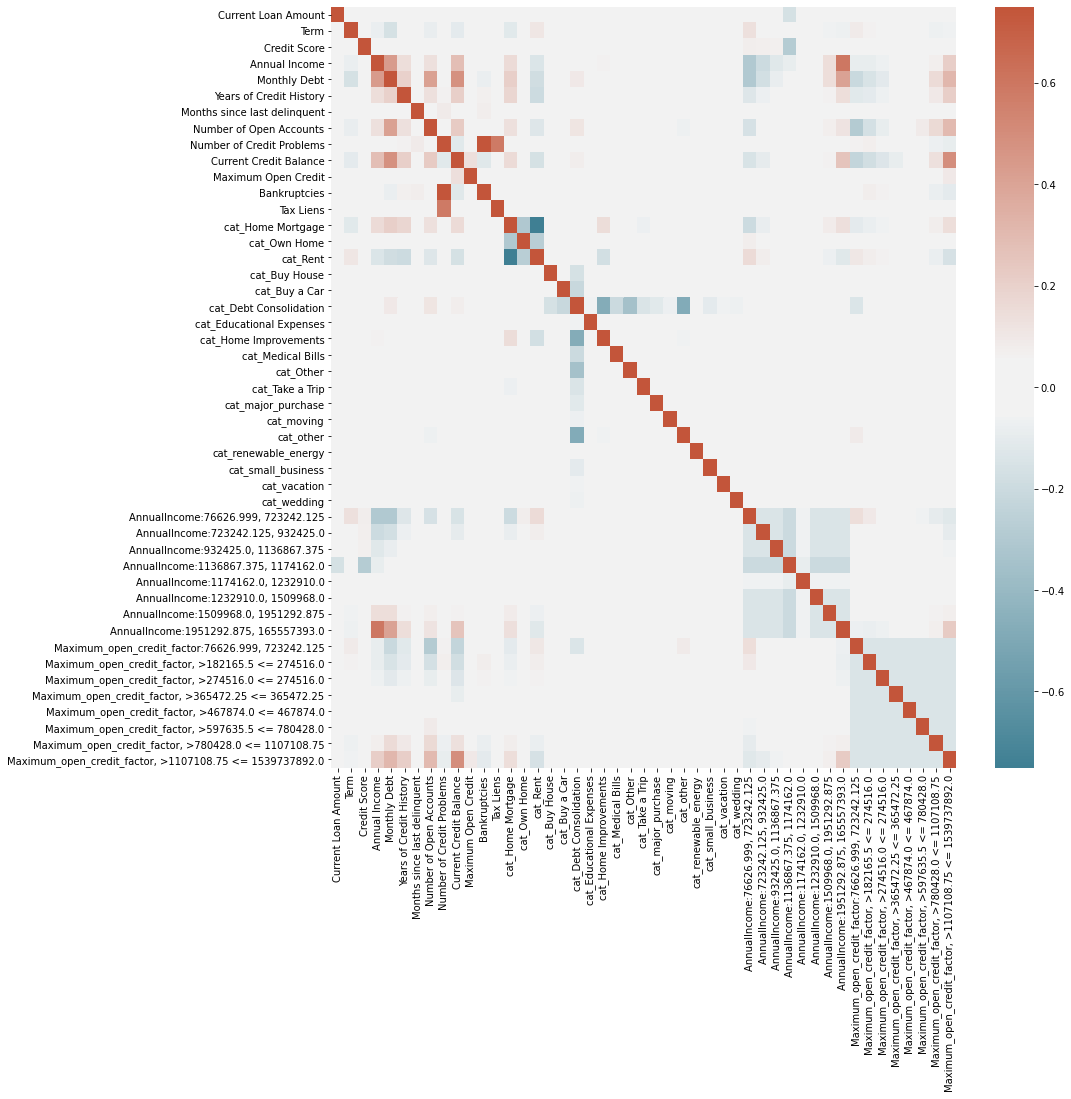

In [ ]:
heatmap(X,figsize=(14,14))

# ***Modeling***

In [ ]:
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
def plot_roc(y_valid, y_pred_proba):
  fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
  plt.plot(fpr, tpr)
  plt.plot(fpr, fpr, linestyle = '--', color = 'k')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=300)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_valid)

In [ ]:
y_pred_proba = lr.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     15575
           1       0.93      0.21      0.34      4528

    accuracy                           0.82     20103
   macro avg       0.87      0.60      0.62     20103
weighted avg       0.84      0.82      0.77     20103



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

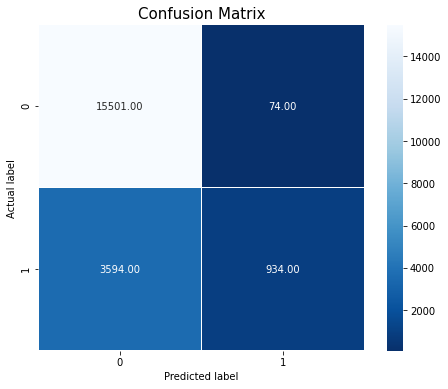

In [ ]:
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

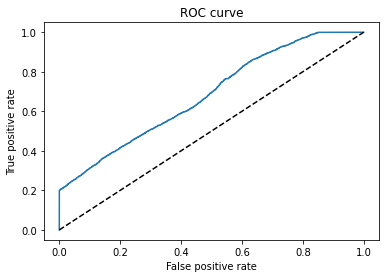

In [ ]:
plot_roc(y_valid, y_pred_proba)

In [ ]:
roc_auc_score(y_valid, y_pred_proba)

0.6823319002433228

In [ ]:
rf = RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred_proba = rf.predict_proba(X_valid)

In [ ]:
rf_pred = rf.predict(X_valid)

In [ ]:
rf_pred_proba = rf_pred_proba[: ][: , 1]


In [ ]:
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     15575
           1       0.89      0.23      0.37      4528

    accuracy                           0.82     20103
   macro avg       0.86      0.61      0.63     20103
weighted avg       0.83      0.82      0.78     20103



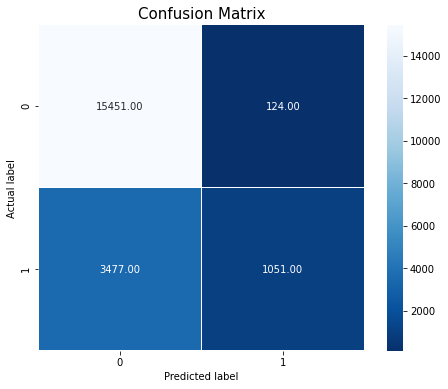

In [ ]:
cm = metrics.confusion_matrix(y_valid, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

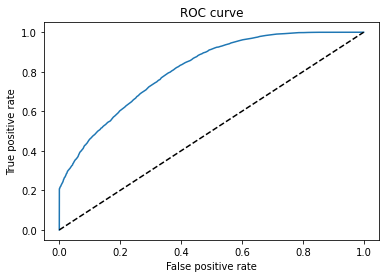

In [ ]:
plot_roc(y_valid, rf_pred_proba)

In [ ]:
roc_auc_score(y_valid, rf_pred_proba)

0.8106685067126466

## Cross Validation and Algorithm Comparison

In [ ]:
lr = LogisticRegression(C=0.2, max_iter=300, solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=500, random_state=10 , min_samples_leaf=2, max_depth=10, min_samples_split=3)

In [ ]:
scoring = 'roc_auc'
models = []
models.append(('LR', lr))
models.append(('RFG', rf))
names = []
results = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, shuffle=True , random_state = 47)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.740074 (0.003441)
RFG: 0.755273 (0.003086)


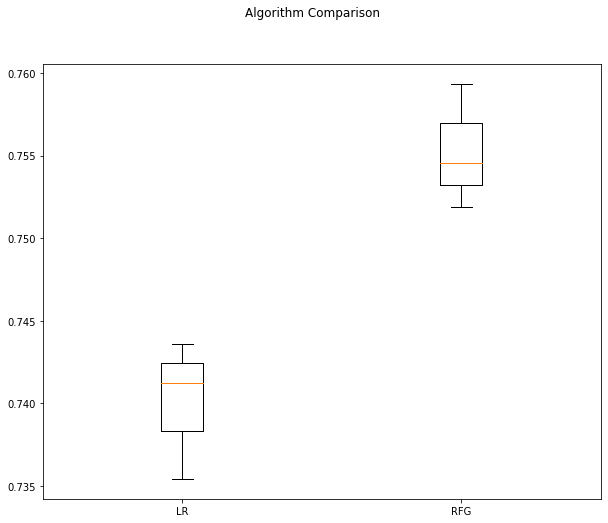

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Best Perfromance on Single Split

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_valid)

In [ ]:
y_pred_proba = rf.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

In [ ]:
roc_auc_score(y_valid, y_pred_proba)

0.7581155244485533

## Imbalanced Classification Problem

In [ ]:
samp = RandomOverSampler()

In [ ]:
y_train.value_counts()

0    62300
1    18111
Name: default_not, dtype: int64

In [ ]:
X_train_resampled, y_train_resampled = samp.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(sorted(Counter(y_train_resampled).items()))

[(0, 62300), (1, 62300)]


In [ ]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_proba = rf.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

In [ ]:
y_pred = rf.predict(X_valid)

In [ ]:
roc_auc_score(y_valid, y_pred_proba)

0.7573305389968749

Its obvious Oversampling didn't help out score to improve

# ***Model Selection and Evaluation***

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_valid) 
y_pred_proba = rf.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

#### Decision Boundary and Confusion Matrix

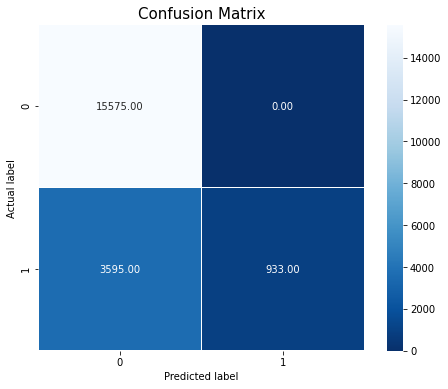

In [ ]:
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15575
           1       1.00      0.21      0.34      4528

    accuracy                           0.82     20103
   macro avg       0.91      0.60      0.62     20103
weighted avg       0.85      0.82      0.77     20103



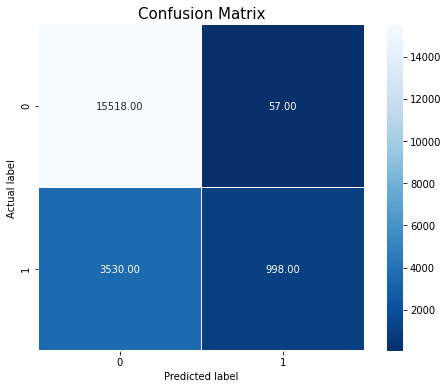

In [ ]:
predictions = pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_pred_proba)], axis = 1)
predictions.columns = ['y_pred', 'y_pred_proba']

tr = 0.4
# a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
predictions['y_pred'] = np.where(predictions['y_pred_proba'] > tr, 1, 0)

cm = metrics.confusion_matrix(y_valid, predictions['y_pred'])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
print(classification_report(y_valid, predictions['y_pred']))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     15575
           1       0.95      0.22      0.36      4528

    accuracy                           0.82     20103
   macro avg       0.88      0.61      0.63     20103
weighted avg       0.84      0.82      0.78     20103



#### ROC Curve

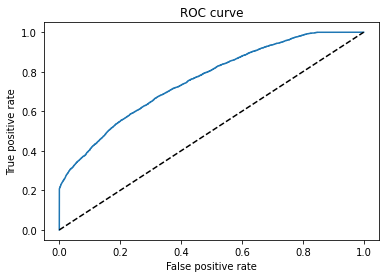

In [ ]:
plot_roc(y_valid, y_pred_proba)

#### AUC score and Gini 

In [ ]:
AUC_score = roc_auc_score(y_valid, y_pred_proba)
print("AUC Score: ", AUC_score)

AUC Score:  0.7581155244485533


In [ ]:
Gini = AUC_score * 2 - 1
# Here we calculate Gini from AUROC.
print("Gini Coefficient: ", Gini)

Gini Coefficient:  0.5162310488971067


# **Predictions**

In [ ]:
testsub = 'credit_test.csv'
testsub = pd.read_csv(testsub,  sep=',', low_memory=False)

In [ ]:
y_pred = rf.predict(test) 
y_pred_proba = rf.predict_proba(test)
y_pred_proba = y_pred_proba[: ][: , 1]

In [ ]:
y_pred_proba/=10

In [ ]:
y_pred_proba.shape

(10353,)

In [ ]:
testsub['Probability_of_default'] = y_pred_proba

In [ ]:
testsubi = testsub[['Customer ID', 'Probability_of_default']]
testsubi.head()

,Customer ID,Probability_of_default
0,ded0b3c3-6bf4-4091-8726-47039f2c1b90,0.012621
1,1630e6e3-34e3-461a-8fda-09297d3140c8,0.015925
2,2c60938b-ad2b-4702-804d-eeca43949c52,0.019894
3,12116614-2f3c-4d16-ad34-d92883718806,0.022203
4,39888105-fd5f-4023-860a-30a3e6f5ccb7,0.015513


## **5. Evaluation of result**

From the above, we were able to solve an important Business problem in regards to Loan issuance for financial institution to customer. The model has a probability score given to each customer that range from 0.002 to 0.08. The lower the score the higher the risk for that customer. This score range helps checkmate if a given customer is liable to default if given loan.
However, there are few things to take into consideration:
1. There is still avenue to improve model performance such as conducting another Feature engineering and the above method didn't have a strong use for the model

2. Missing value as we understand that all columns has missing values. Most importantly, credit score column has a distinct missing value which affect the rest of the data as well. This should be avoided as it is an important feature and filling it brings bias to our model which leads to error in predicting possible customer that will default. This is as a result of Missing not at random. Other columns such as current loan amount, annual income, Months since last delinquent and Bankruptcies among others also had missing values with will practically make our model predict wrongly.

3. The imbalance nature of the dataset in regard to **default_not** column is high and this is another major reason why the model is performing badly in recall for default class. A more better approch could be to use statistical method to resample the data to help solve Imbalance case. Also, we could try Undersampling to see if this could work,.

3. we could also do hyperparameter on the selected algorithm and create a robust pipeline to enable model work freely in production environment but due to time it is best to maintain this method.